In [104]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv("car.csv")
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8123,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8125,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [105]:
#cleaning
df.isna().sum
df=df.dropna()
df=df.reset_index(drop=True)

In [106]:
#Feature Engineering


#seats
df['seats'].value_counts()

seats
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [107]:
#torque
df['torque']
#here we cannot simmlifly our column thats way we hahve to drop it 
df=df.drop(columns=['torque'])

In [108]:
#max power
#first we have to remove bhp characters from data so that it is convertable into float
def fxn(x):
    return x.split()[0]

df['max_power']=df['max_power'].apply(fxn)
df

#converting into float    
#df['max_power']=df['max_power'].astype("float32")

#find out illegal value that is not convertable in to float 
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        index.append(i)

print(index)
#drop the illegal value index
df=df.drop(index=index)
df=df.reset_index(drop=True)
#again convert ncolumn into float
df['max_power']=df['max_power'].astype("float32")
df

[840]


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.000000,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.519997,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78.000000,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.000000,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.849998,5.0
7901,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110.000000,5.0
7902,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.900002,5.0
7903,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70.000000,5.0


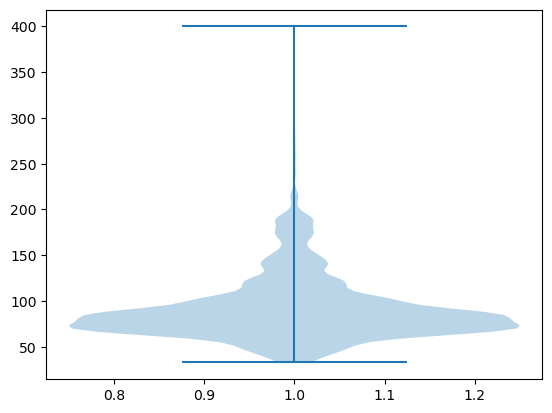

In [109]:
plt.violinplot(df['max_power'])
plt.show()

In [110]:
def fxn(x):
    return x.split()[0]
df['engine']=df['engine'].apply(fxn)
df

#converting into float    
#df['max_power']=df['max_power'].astype("float32")

#find out illegal value that is not convertable in to float 
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-3])
    except:
        index.append(i)

print(index)
#drop the illegal value index
df=df.drop(index=index)
df=df.reset_index(drop=True)
#again convert ncolumn into float
df['engine']=df['engine'].astype("float32")
df

[968]


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.000000,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.519997,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.000000,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.000000,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197.0,82.849998,5.0
7900,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493.0,110.000000,5.0
7901,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248.0,73.900002,5.0
7902,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396.0,70.000000,5.0


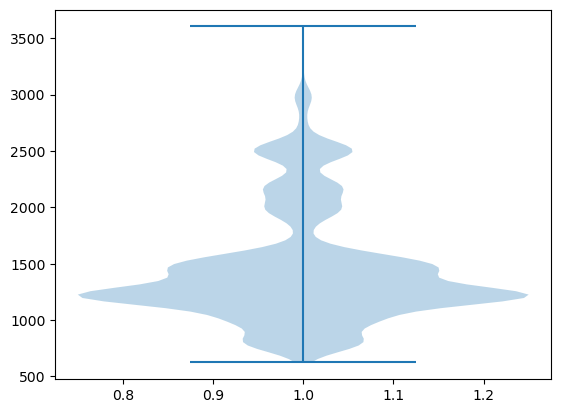

In [111]:
plt.violinplot(df['engine'])
plt.show()

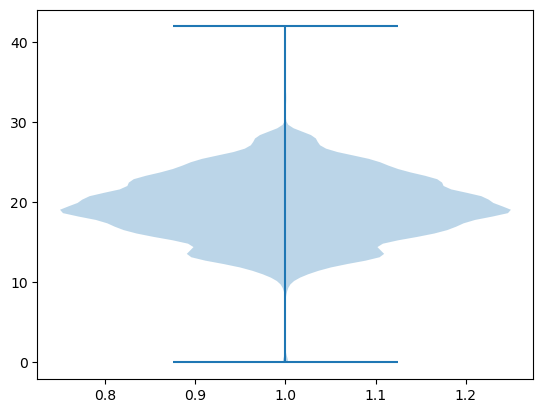

In [112]:
#mileage
def fxn(x):
    return x.split()[0]
df['mileage']=df['mileage'].apply(fxn)
df['mileage']=df['mileage'].astype('float32')
df

plt.violinplot(df['mileage'])
plt.show()


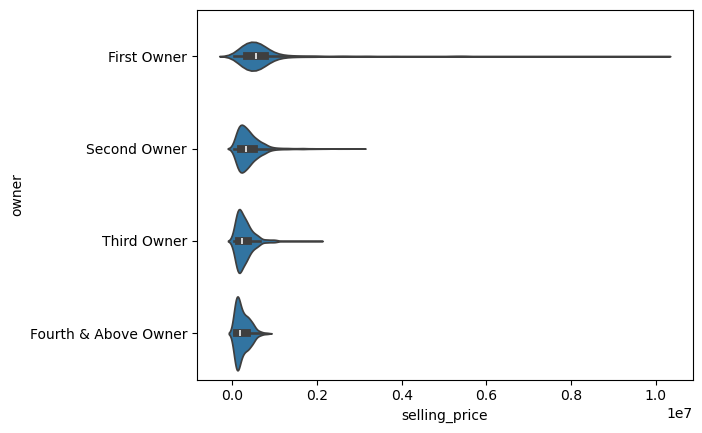

In [113]:
#Owner
df['owner'].value_counts()
df['owner']=df['owner'].replace({"Fifth":"Fourth & Above Owner"})


f=df['owner']=='Test Drive Car'
df=df.drop(index=df[f].index)
df=df.reset_index(drop=True)

df['owner'].value_counts()
#making plots of each category
import seaborn
seaborn.violinplot(data=df,x='selling_price',y='owner')
#here seaborn violin plot is making violin plot for each category selling price
plt.show()

In [114]:
#transmission
df['transmission'].value_counts()

transmission
Manual       6862
Automatic    1037
Name: count, dtype: int64

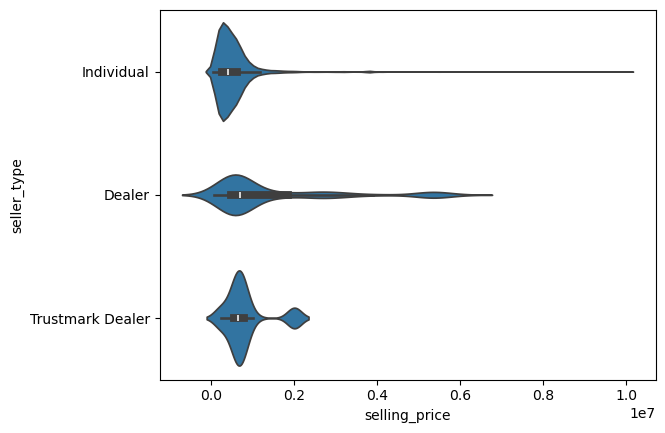

In [115]:
#seller type
df['seller_type'].value_counts


import seaborn
seaborn.violinplot(data=df,x='selling_price',y='seller_type')
#here seaborn violin plot is making violin plot for each category selling price
plt.show()


#In graph we can see the distribution og three ctegories is different from each other 
#non ordinal column 

In [116]:
#fuel
df['fuel'].value_counts()

fuel
Diesel    4298
Petrol    3514
CNG         52
LPG         35
Name: count, dtype: int64

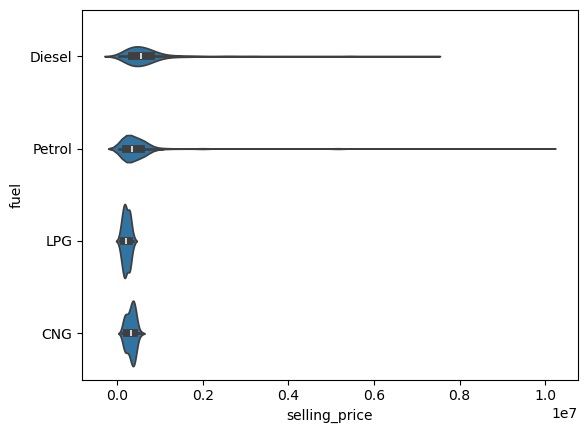

fuel
Diesel    4298
Petrol    3514
Eco         87
Name: count, dtype: int64

In [117]:
import seaborn
seaborn.violinplot(data=df,x='selling_price',y='fuel')
#here seaborn violin plot is making violin plot for each category selling price
plt.show()



#by visualization we see that there is no impect of carr as lpg or cng 
#so merge both category in t one

df['fuel']=df['fuel'].replace({"LPG":"Eco","CNG":"Eco"})
df['fuel'].value_counts()

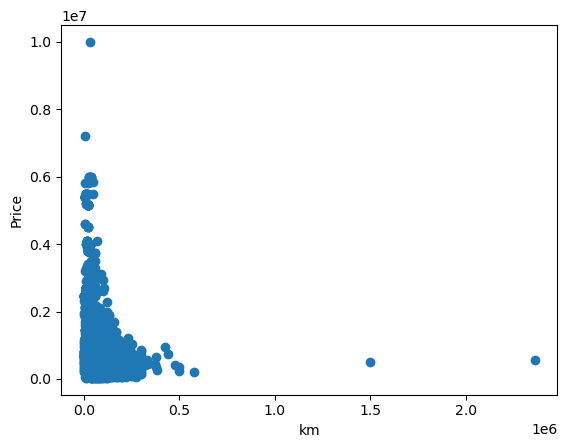

In [118]:
#km driven
plt.scatter(df['km_driven'],df['selling_price'])
plt.xlabel("km")
plt.ylabel("Price")
plt.show()

In [119]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Maruti Zen Estilo Sports                          1
Skoda Fabia 1.4 TDI Ambiente                      1
Mahindra Scorpio VLX 2WD AT BSIII                 1
Renault KWID Climber 1.0 AMT                      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1979, dtype: int64

In [120]:
#categories count is very high so dont directly apply one hot encoding 
#Approach -> Merge the categories

df['name']=df['name'].apply(lambda x:x.split()[0])
print(df['name'].value_counts())#31 categoriesx

name
Maruti           2366
Hyundai          1359
Mahindra          758
Tata              719
Honda             465
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        184
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: count, dtype: int64


In [121]:
#find average selling price of each brand 

groups=df.groupby('name')
prices=groups['selling_price'].mean()
prices=prices.sort_values(ascending=False)
print(prices)



name
Lexus            5.150000e+06
BMW              4.153814e+06
Land             3.608333e+06
Volvo            3.272015e+06
Jaguar           2.915465e+06
Mercedes-Benz    2.470444e+06
Audi             2.319432e+06
Jeep             2.149613e+06
Isuzu            1.942000e+06
MG               1.783333e+06
Kia              1.504500e+06
Toyota           1.011920e+06
Force            8.875000e+05
Mitsubishi       8.175000e+05
Mahindra         6.300211e+05
Skoda            6.097211e+05
Honda            5.939035e+05
Ford             5.208737e+05
Volkswagen       4.852174e+05
Hyundai          4.735110e+05
Nissan           4.654074e+05
Renault          4.626184e+05
Maruti           4.090910e+05
Tata             3.618538e+05
Fiat             3.171951e+05
Datsun           3.146000e+05
Ashok            3.000000e+05
Chevrolet        2.738675e+05
Ambassador       1.240000e+05
Daewoo           7.700000e+04
Opel             6.800000e+04
Name: selling_price, dtype: float64


In [122]:
#converting brands into 3 or 4 categories based on their average price 

def fxn(x):
    if x in prices.index[0:10]:
        return 2
    elif x in prices.index[10:25]:
        return 1
    else:
        return 0

df['name']=df['name'].apply(fxn)
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0
1,1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0
2,2,1,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,5.0
3,3,1,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0
4,4,1,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,8122,1,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,5.0
7895,8123,1,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,5.0
7896,8124,1,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,5.0
7897,8125,1,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,5.0


#statistical Analysis

In [124]:
#make the two variables
numeric=df[['year','selling_price','km_driven','mileage','engine','max_power','seats']]
category=df[['name','fuel','seller_type','transmission','owner']]

#note before statistical analysis of category they should be in numeric form

category['fuel']=category['fuel'].replace({"Petrol":0,"Diesel":1,"Eco":2})
category['seller_type']=category['seller_type'].replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
category['transmission']=category['transmission'].replace({"Manual":0,"Automatic":1})
category['owner']=category['owner'].replace({"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3})
category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7480\642676189.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  category['fuel']=category['fuel'].replace({"Petrol":0,"Diesel":1,"Eco":2})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7480\642676189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['fuel']=category['fuel'].replace({"Petrol":0,"Diesel":1,"Eco":2})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7480\642676189.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

,name,fuel,seller_type,transmission,owner
0,1,1,0,0,0
1,1,1,0,0,1
2,1,0,0,0,2
3,1,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7894,1,0,0,0,0
7895,1,1,0,0,3
7896,1,1,0,0,0
7897,1,1,0,0,0


In [125]:
numeric

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.400000,1248.0,74.000000,5.0
1,2014,370000,120000,21.139999,1498.0,103.519997,5.0
2,2006,158000,140000,17.700001,1497.0,78.000000,5.0
3,2010,225000,127000,23.000000,1396.0,90.000000,5.0
4,2007,130000,120000,16.100000,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...
7894,2013,320000,110000,18.500000,1197.0,82.849998,5.0
7895,2007,135000,119000,16.799999,1493.0,110.000000,5.0
7896,2009,382000,120000,19.299999,1248.0,73.900002,5.0
7897,2013,290000,25000,23.570000,1396.0,70.000000,5.0


In [126]:
#feature selection
#it is a concept of selecting important features who have direct ore indirect relation with dependent 
#4 case 
#1- Numeric independent   numeric dependent-> Person correlation method
#2- Numeric independent   Category dependent-> anova test
#3- category independent    Numeric dependent->anona test
#4- Category independent     Category dependent-> chi square test,mutual information

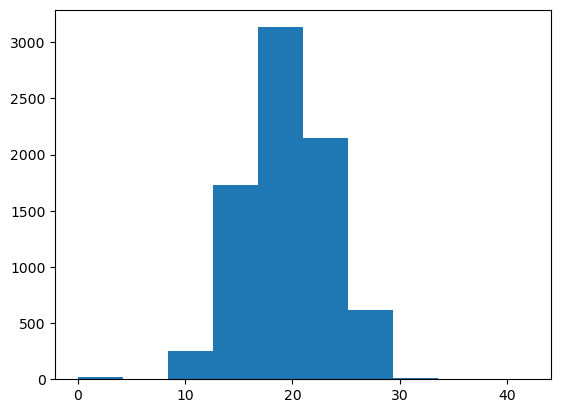

4.036935329437256

In [127]:
df['mileage']
plt.hist(df['mileage'])
plt.show()


#measure of central tendency
#mean
#standard diviation : measure of how far our data is from mean
df['mileage'].std()



In [128]:
#distribution-> distribution is a way of seeing the probability  of samples in the column.
#ex: [1,2,2,3,3,4,]
#there are sum comman distribution patterns who have thier name.
#ex: Dice problem
#dice: 1,2,3,4,5,6
#lets throw dice what is the probability of coming1:? 1/6
#2-> 1/6
#3->1/6
#4->1/6
#5->1/6
#6->1/6



#EXAMPLE2-> Throw 2 Dice
#find probability of total sum of values
#total cases :36
#1->sum2-> 1 case (1,1)  2/36
#2->sum3->(1,2),(2,1)->cases2 2/36
#3->sum4->(1,3),(3,1)<(2,2) 3/36





#above distribution is as Normal distribution.
#it is the world most importent distribution.
#most of the ML algorithim are developed by supposing data as normally distribution
#why importent?
#1-> many real time datasets belong to normal distribution.
#2-> mean-mode-medium.
#3-> if our data is normally distribution we can easily find outliers from it.
#and also it become easy to pridict something from that.

In [129]:
#variance:it is the square of standard deviation 
#Skewness-> it is measure of how our distribution curve deviates from 
#perfect curve or center

df['mileage'].skew()
#Note: if skewness is between -1 to +2 then our data is perfectly normal
#otherwise it contains outliers

-0.14310803

In [130]:
#Kurtosis 
#it is the measure of how much our curve is flat or sharp
df['mileage'].kurt()

0.5715528

In [131]:
#pearson correlation method
#it tells how much dependent column varies if we vary our independent column
#if value of correlation is -1 that means if we incearse one column by 10%
#then second column will decrease by 10%
#ex: birth year va age _> both have full negative correlation 

#if value of correlation is +1 that means if we increase one column by 10% 
#then second column will also increase by 10%


#if correlation is very near to zero that means there is no impect of independent of dependent...
#it tells the relation of each numeric column wrt to depnedent variable
corr=numeric.corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.412465,-0.428540,0.329372,0.017638,0.225322,-0.007642
selling_price,0.412465,1.000000,-0.221519,-0.124687,0.457972,0.750335,0.043225
km_driven,-0.428540,-0.221519,1.000000,-0.173624,0.207376,-0.036686,0.227731
mileage,0.329372,-0.124687,-0.173624,1.000000,-0.576354,-0.374148,-0.452019
engine,0.017638,0.457972,0.207376,-0.576354,1.000000,0.704240,0.611352
max_power,0.225322,0.750335,-0.036686,-0.374148,0.704240,1.000000,0.192773
seats,-0.007642,0.043225,0.227731,-0.452019,0.611352,0.192773,1.000000


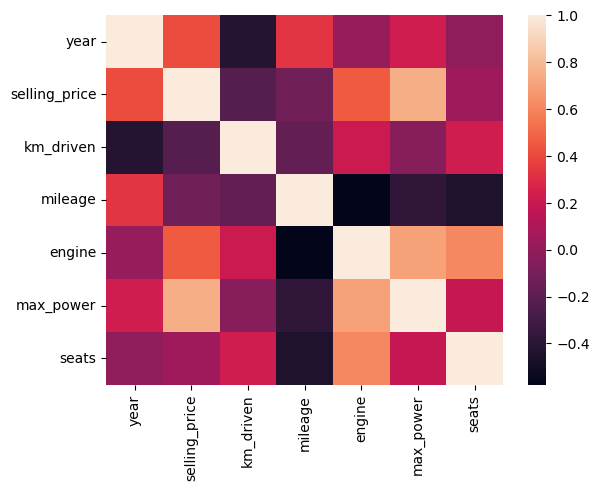

In [132]:
seaborn.heatmap(data=corr)
#tells relation between column in the form of color
plt.show()

In [133]:
from sklearn.feature_selection import f_classif, SelectKBest

#f_classif ----> performing annova test
#selectKBest ---> use to select top columns which are importent wrt to the dependent column 

select= SelectKBest(f_classif,k=3)
columns=select.fit_transform(category,numeric["selling_price"])
print(select.scores_)

[12.62495221  3.11258891  6.7549591  12.03276301  3.72507073]


In [134]:
#dof b---> 5
#dof w--> 22
#if the value of f score is greater than the critical value then we will reject the null hypothesis.
#otherwise we accept it.


In [135]:
#outlier detection 
#outlier --->data points which are falling out of genral pattern.
#like kilometers...
#why we have to remove outlier---> to improve the R2 score 

#to detect outliers 
#case1---> when our data is normally distributed
#case2--> when our data belongs to pure random(unknow distribution)


#case1---> when our data is normally distributed-->method used for outlier detection
#Z score

#mean=10 std=2
#-2 10 +2
#8 and 12---> belong to first std deviation
#6 and 14---> belong to second std deviation
#4 and 16--> belong to third std deviation 
#if any data point is falling out of this range will be considered as an outlier 

#according to gaussion
#if the data is normally distributed, then 68% of data ---> belong to first std dev
#95% of datA belong to second std dev
#99.7% of data belong to third std dev



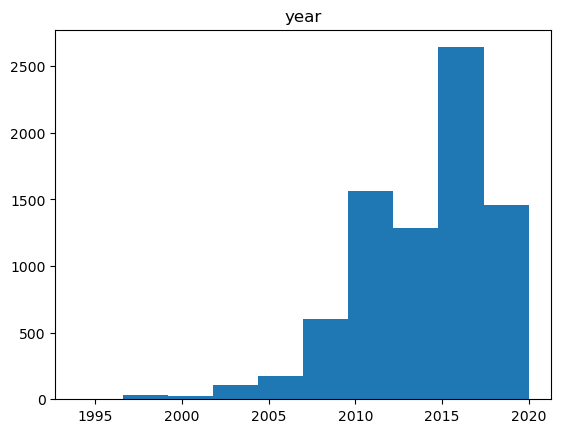

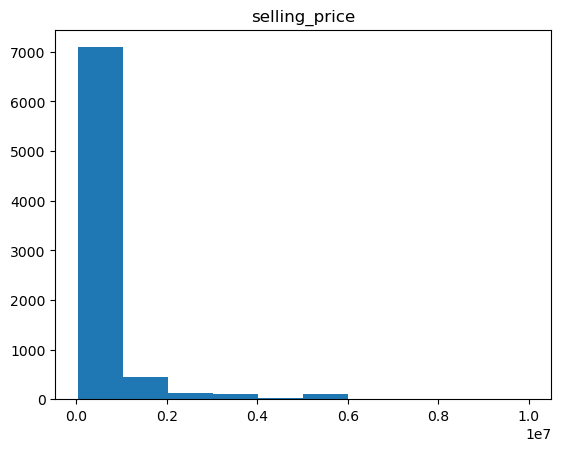

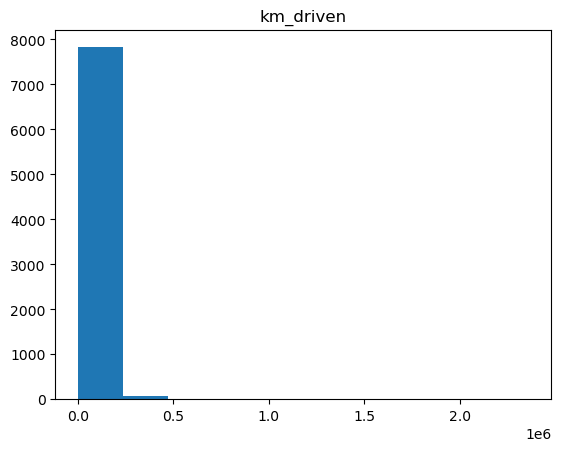

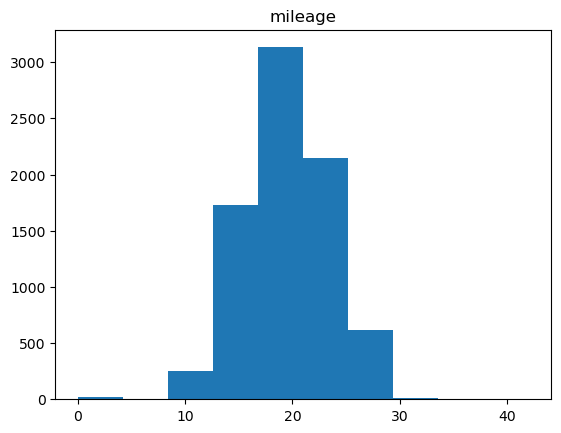

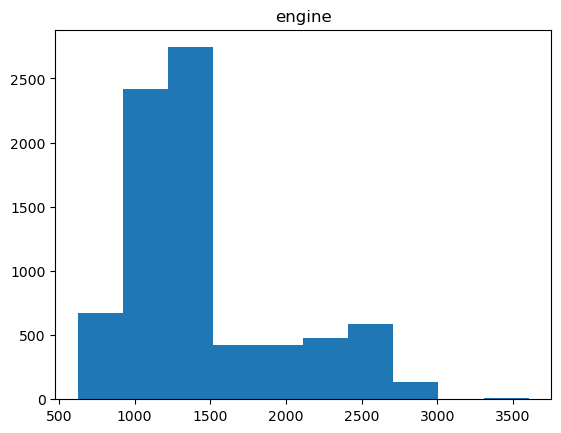

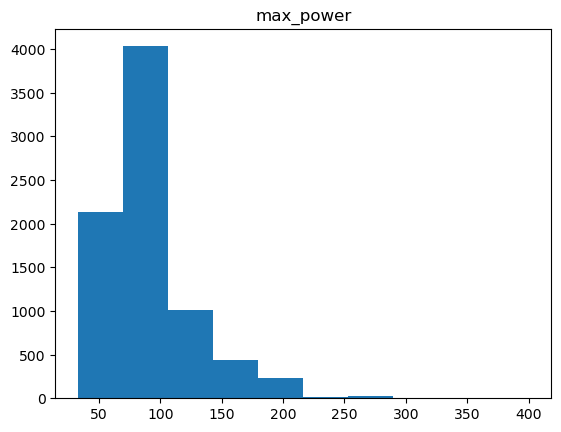

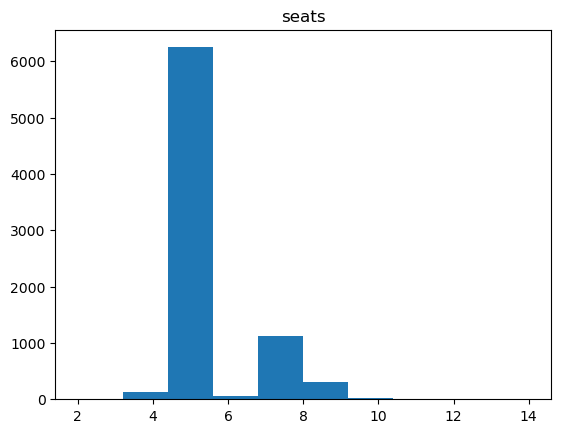

In [136]:
for column in numeric.columns:
    plt.hist(numeric[column])
    plt.title(column)
    plt.show()

In [137]:
#km_driven, mileage and maz power ---> normally distributed.

In [138]:
#detect outlier ok km_driven
import numpy as np
def detect(column):
    mean=column.mean()
    Std=column.std()
    z_score=(column-mean)/Std
    return column[(z_score>3)| (z_score<-3)]

outlier=detect(numeric['km_driven'])
print(outlier)


f=numeric['km_driven'].isin(outlier)
numeric=numeric[~f]
category=category[~f]

outlier=detect(numeric['mileage'])
f=numeric['mileage'].isin(outlier)
numeric=numeric[~f]
category=category[~f]


outlier=detect(numeric['max_power'])
f=numeric['max_power'].isin(outlier)
numeric=numeric[~f]
category=category[~f]

numeric=numeric.reset_index(drop=True)
category=category.reset_index(drop=True)


380     240000
387     265000
447     250000
857     300000
1197    300000
         ...  
7424    250000
7720    250000
7744    250000
7803    300000
7849    250000
Name: km_driven, Length: 70, dtype: int64


In [139]:
#mileage 
a= numeric["mileage"].mean()
print(a)
b=numeric["mileage"].std()
print(b)

19.527348
3.866621494293213


In [140]:
#z score--->
#formula-->z score= x-mean/std
#z score
#(x-mean)/std
#if a value has z score of more than +3 or less -3 then it will be considered as an outlier.
#z score--> that basscally returned std deviation will be each data point with repesct to mean.


In [141]:
# def detect(column):
#     mean=column.mean()
#     std=column.std()
#     z_score=(column-mean)/std
#     return column[(z_score>3) | (z_score<-3)]

# #out=detect(numeric["km_driven"])

# out=detect(numeric["mileage"])
# print(out)

In [142]:
#case2--> unknown distribution 
#DBSCAN---> density based spatial clustering of application with noise
#data points--> it creates clusters
#it also helps to detect the outliers


#epsilon --> radius around the data points 
#min neighbor/min samples--> minimum samples required to form a dense region


#there are 3 types of points in DBSCAN
#core points--> there should be atleast number of data point mentioned in the min neighbor 
#border points--> in the circle/ redius there are points less then min neighbors 
#noise point--> when no data point /min neighbor is present in the circle

In [143]:
data=numeric[["engine","selling_price"]]
#scaling
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
data=m.fit_transform(data)
data

array([[0.24242424, 0.07279046],
       [0.33954934, 0.05892564],
       [0.33916084, 0.02218388],
       ...,
       [0.24242424, 0.06100536],
       [0.2999223 , 0.04506082],
       [0.2999223 , 0.04506082]])

In [144]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan=DBSCAN(eps=0.06,min_samples=10)
dbscan.fit(data)
labels=dbscan.labels_
#print(np.unique(labels))
#labels--> -1 means that it consists of all the nosie points
print(np.unique(labels,return_counts=True))
#that sample who contains similer number of point are labeld in one category

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([  24, 6148, 1318,   55,   24,   41,   67,   12,   25], dtype=int64))


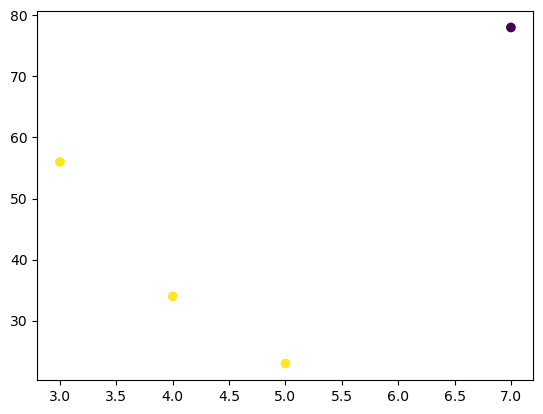

In [145]:
l=[3,4,5,7]
l1=[56,34,23,78]
#colors=["red","yellow","green","black"]
colors=[1,1,1,0]
plt.scatter(l,l1,c=colors)
plt.show()

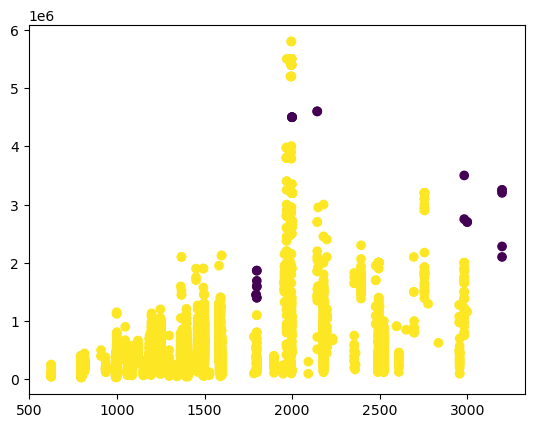

In [146]:
label=np.where(labels>-1,0,-1)
#np.where (condition, value if true ,value if false)


plt.scatter(numeric["engine"],numeric["selling_price"],c=label)
plt.show()

In [147]:
y=numeric['selling_price']
numeric=numeric.drop(columns=['selling_price'])
X=pd.concat((numeric,category),axis=1)

In [200]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer([('encode',OneHotEncoder(),[7,8])],remainder='passthrough')
category=ct.fit_transform(category)

category.shape

(7714, 13)

In [202]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [206]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9770178701318261
